In [95]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [96]:
df=pd.read_csv("/content/NYCTaxiFares.csv")

In [97]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [98]:
df['fare_amount'].describe()

count    120000.000000
mean         10.040326
std           7.500134
min           2.500000
25%           5.700000
50%           7.700000
75%          11.300000
max          49.900000
Name: fare_amount, dtype: float64

In [99]:
#calculating distance based on lat and long points
def haversine_distance(df, lat1, long1, lat2, long2):
    r = 6371  # average radius of Earth in kilometers  
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers
    return d

In [100]:
df["distance_km"]=haversine_distance(df,"pickup_latitude","pickup_longitude","dropoff_latitude","dropoff_longitude")

In [101]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
 8   distance_km        120000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 8.2+ MB


In [103]:
df["pickup_datetime"]=pd.to_datetime(df["pickup_datetime"])

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   pickup_datetime    120000 non-null  datetime64[ns, UTC]
 1   fare_amount        120000 non-null  float64            
 2   fare_class         120000 non-null  int64              
 3   pickup_longitude   120000 non-null  float64            
 4   pickup_latitude    120000 non-null  float64            
 5   dropoff_longitude  120000 non-null  float64            
 6   dropoff_latitude   120000 non-null  float64            
 7   passenger_count    120000 non-null  int64              
 8   distance_km        120000 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(2)
memory usage: 8.2 MB


In [105]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [106]:
my_time=df['pickup_datetime'][0]

In [107]:
my_time

Timestamp('2010-04-19 08:17:56+0000', tz='UTC')

In [108]:
df["EDT_Time"]=df["pickup_datetime"]-pd.Timedelta(hours=4)

In [109]:
df['Hour']=df["EDT_Time"].dt.hour
df["AMorPM"]=np.where(df['Hour']<12,"am","pm")
df["Weekday"]=df["EDT_Time"].dt.strftime("%a") 

In [110]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,EDT_Time,Hour,AMorPM,Weekday
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am,Mon
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am,Sat
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am,Sat
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm,Sun
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm,Fri


In [111]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'distance_km', 'EDT_Time', 'Hour', 'AMorPM',
       'Weekday'],
      dtype='object')

In [112]:
cat_cols=["Hour","AMorPM","Weekday"]
cont_cols=['pickup_longitude',
           'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
           'passenger_count', 'distance_km']

In [113]:
y_col=["fare_class"]

In [114]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
distance_km                      float64
EDT_Time             datetime64[ns, UTC]
Hour                               int64
AMorPM                            object
Weekday                           object
dtype: object

In [115]:
for cat in cat_cols:
  df[cat]=df[cat].astype("category")

In [116]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
distance_km                      float64
EDT_Time             datetime64[ns, UTC]
Hour                            category
AMorPM                          category
Weekday                         category
dtype: object

In [117]:
df["Weekday"].cat.codes.values

array([1, 2, 2, ..., 3, 5, 2], dtype=int8)

In [118]:
df["Weekday"].cat.categories

Index(['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'], dtype='object')

In [119]:
hr=df["Hour"].cat.codes.values
wkdy=df["Weekday"].cat.codes.values
ampm=df["AMorPM"].cat.codes.values

In [120]:
cats=np.stack([hr,wkdy,ampm],axis=1)

In [121]:
cats

array([[ 4,  1,  0],
       [11,  2,  0],
       [ 7,  2,  0],
       ...,
       [14,  3,  1],
       [ 4,  5,  0],
       [12,  2,  1]], dtype=int8)

In [122]:
cats=np.stack([df[col].cat.codes.values for col in cat_cols],1)

In [123]:
cats

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       ...,
       [14,  1,  3],
       [ 4,  0,  5],
       [12,  1,  2]], dtype=int8)

In [124]:
cats=torch.tensor(cats,dtype=torch.int64)

In [125]:
cats

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        ...,
        [14,  1,  3],
        [ 4,  0,  5],
        [12,  1,  2]])

In [126]:
conts=np.stack([df[col].values for col in cont_cols],axis=1)

In [127]:
conts

array([[-73.992365  ,  40.730521  , -73.975499  ,  40.744746  ,
          1.        ,   2.12631159],
       [-73.990078  ,  40.740558  , -73.974232  ,  40.744114  ,
          1.        ,   1.39230687],
       [-73.994149  ,  40.751118  , -73.960064  ,  40.766235  ,
          2.        ,   3.32676344],
       ...,
       [-73.988574  ,  40.749772  , -74.011541  ,  40.707799  ,
          3.        ,   5.05252282],
       [-74.004449  ,  40.724529  , -73.992697  ,  40.730765  ,
          1.        ,   1.20892296],
       [-73.955415  ,  40.77192   , -73.967623  ,  40.763015  ,
          3.        ,   1.42739869]])

In [128]:
conts=torch.tensor(conts,dtype=torch.float)

In [129]:
conts

tensor([[-73.9924,  40.7305, -73.9755,  40.7447,   1.0000,   2.1263],
        [-73.9901,  40.7406, -73.9742,  40.7441,   1.0000,   1.3923],
        [-73.9941,  40.7511, -73.9601,  40.7662,   2.0000,   3.3268],
        ...,
        [-73.9886,  40.7498, -74.0115,  40.7078,   3.0000,   5.0525],
        [-74.0044,  40.7245, -73.9927,  40.7308,   1.0000,   1.2089],
        [-73.9554,  40.7719, -73.9676,  40.7630,   3.0000,   1.4274]])

In [177]:
y=torch.tensor(df[y_col].values).flatten()

In [178]:
y

tensor([0, 0, 1,  ..., 1, 0, 0])

In [179]:
print(cats.shape,conts.shape,y.shape)

torch.Size([120000, 3]) torch.Size([120000, 6]) torch.Size([120000])


In [180]:
cat_sizes=[len(df[col].cat.categories) for col in cat_cols]

In [181]:
cat_sizes

[24, 2, 7]

In [182]:
emb_sizes=[(size,min(50,(size+1)//2)) for size in cat_sizes]

In [183]:
emb_sizes

[(24, 12), (2, 1), (7, 4)]

In [184]:
catz=cats[:4]

In [185]:
catz

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        [17,  1,  3]])

In [186]:
selfembeds=nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in emb_sizes])

In [187]:
selfembeds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [188]:
#this happens in forword pass
embeddingz = []
for i,e in enumerate(selfembeds):
    embeddingz.append(e(catz[:,i]))
embeddingz

[tensor([[ 1.1866, -0.8534,  0.2298, -0.4676,  0.4662, -0.4975,  0.2463, -2.3450,
          -0.3100, -1.2568, -1.1048, -0.0980],
         [-1.7903,  1.2829,  1.6427,  1.8511,  0.3940, -1.4382,  0.3038, -0.5936,
           1.3274,  0.4781, -1.6888,  0.0876],
         [ 0.2134, -1.1510, -0.4249, -0.8876,  0.0907, -0.8118,  1.0837,  0.3473,
          -0.6726, -0.2734, -2.3194,  0.9835],
         [ 1.5103, -0.9924, -1.0887, -0.6795, -1.3686,  0.6179,  0.6874, -0.0448,
          -0.6985,  0.0534, -1.3575, -0.6431]], grad_fn=<EmbeddingBackward>),
 tensor([[0.2089],
         [0.2089],
         [0.2089],
         [0.4535]], grad_fn=<EmbeddingBackward>),
 tensor([[ 0.7265, -0.9307, -0.9903,  1.2585],
         [ 0.5551, -2.2483,  0.7023,  0.4862],
         [ 0.5551, -2.2483,  0.7023,  0.4862],
         [-0.8657, -0.8851, -0.2246,  0.7733]], grad_fn=<EmbeddingBackward>)]

In [189]:
z=torch.cat(embeddingz,1)

In [190]:
z

tensor([[ 1.1866, -0.8534,  0.2298, -0.4676,  0.4662, -0.4975,  0.2463, -2.3450,
         -0.3100, -1.2568, -1.1048, -0.0980,  0.2089,  0.7265, -0.9307, -0.9903,
          1.2585],
        [-1.7903,  1.2829,  1.6427,  1.8511,  0.3940, -1.4382,  0.3038, -0.5936,
          1.3274,  0.4781, -1.6888,  0.0876,  0.2089,  0.5551, -2.2483,  0.7023,
          0.4862],
        [ 0.2134, -1.1510, -0.4249, -0.8876,  0.0907, -0.8118,  1.0837,  0.3473,
         -0.6726, -0.2734, -2.3194,  0.9835,  0.2089,  0.5551, -2.2483,  0.7023,
          0.4862],
        [ 1.5103, -0.9924, -1.0887, -0.6795, -1.3686,  0.6179,  0.6874, -0.0448,
         -0.6985,  0.0534, -1.3575, -0.6431,  0.4535, -0.8657, -0.8851, -0.2246,
          0.7733]], grad_fn=<CatBackward>)

In [191]:
selfemdrop=nn.Dropout(0.4)

In [192]:
z=selfemdrop(z)

In [193]:
z

tensor([[ 1.9776, -0.0000,  0.3830, -0.7793,  0.7771, -0.8291,  0.0000, -3.9083,
         -0.0000, -2.0947, -1.8413, -0.0000,  0.3481,  0.0000, -0.0000, -1.6504,
          0.0000],
        [-2.9838,  0.0000,  2.7379,  0.0000,  0.6566, -2.3969,  0.5063, -0.9894,
          0.0000,  0.0000, -2.8147,  0.1460,  0.3481,  0.0000, -0.0000,  0.0000,
          0.8103],
        [ 0.3557, -1.9184, -0.7082, -0.0000,  0.0000, -0.0000,  0.0000,  0.0000,
         -1.1209, -0.4557, -3.8657,  1.6392,  0.3481,  0.0000, -3.7472,  0.0000,
          0.0000],
        [ 2.5172, -0.0000, -1.8145, -1.1326, -2.2811,  1.0298,  1.1456, -0.0747,
         -0.0000,  0.0891, -2.2625, -1.0718,  0.0000, -1.4428, -1.4752, -0.3743,
          0.0000]], grad_fn=<MulBackward0>)

In [194]:
class TabularModel(nn.Module):

    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [195]:
model=TabularModel(emb_sizes,conts.shape[1],2,[200,100],p=0.4)

In [196]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=2, bias=True)
  )
)

In [197]:
batch_size = 60000
test_size = int(batch_size * .2)

cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]
con_train = conts[:batch_size-test_size]
con_test = conts[batch_size-test_size:batch_size]
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [198]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [199]:
import time
start_time=time.time()
epochs=300
losses=[]
for i in range(epochs):
  y_pred=model(cat_train,con_train)
  loss=torch.sqrt(criterion(y_pred,y_train))
  losses.append(loss)
  if i%10==0:
    print(f"Epoch: {i} Loss: {loss}")
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
duration=time.time()-start_time
print(f"Time Taken {duration/60} minutes")

Epoch: 0 Loss: 0.9290812015533447
Epoch: 10 Loss: 0.6812283396720886
Epoch: 20 Loss: 0.6222739815711975
Epoch: 30 Loss: 0.5916263461112976
Epoch: 40 Loss: 0.5809396505355835
Epoch: 50 Loss: 0.5702160596847534
Epoch: 60 Loss: 0.563466489315033
Epoch: 70 Loss: 0.5568946599960327
Epoch: 80 Loss: 0.5486437082290649
Epoch: 90 Loss: 0.5479857921600342
Epoch: 100 Loss: 0.5446680784225464
Epoch: 110 Loss: 0.5410700440406799
Epoch: 120 Loss: 0.5381746888160706
Epoch: 130 Loss: 0.533282995223999
Epoch: 140 Loss: 0.5348465442657471
Epoch: 150 Loss: 0.5303019285202026
Epoch: 160 Loss: 0.5292402505874634
Epoch: 170 Loss: 0.5269650816917419
Epoch: 180 Loss: 0.5240101218223572
Epoch: 190 Loss: 0.5202726721763611
Epoch: 200 Loss: 0.5189794301986694
Epoch: 210 Loss: 0.5161715149879456
Epoch: 220 Loss: 0.514326274394989
Epoch: 230 Loss: 0.51177978515625
Epoch: 240 Loss: 0.5095949769020081
Epoch: 250 Loss: 0.5095400214195251
Epoch: 260 Loss: 0.5076805949211121
Epoch: 270 Loss: 0.504728376865387
Epoch: 28

In [200]:
def plot_loss(ls,ep):
  plt.plot(range(epochs),ls)
  plt.ylabel("Loss")
  plt.xlabel("Epoch")

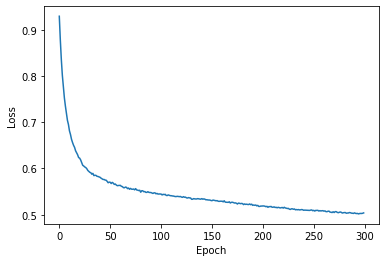

In [201]:
plot_loss(losses,epochs)

In [202]:
with torch.no_grad():
  y_val=model(cat_test,con_test)
  loss=torch.sqrt(criterion(y_val,y_test))

In [203]:
loss

tensor(0.5016)

In [205]:
for j in range(100):
  i=np.random.randint(test_size)
  print(f"{y_val[i]} \t Predicted: {y_val[i].argmax().item()} \t TrueValue: {y_test[i]} ")

tensor([-0.4858,  0.8201]) 	 Predicted: 1 	 TrueValue: 1 
tensor([ 1.2053, -0.6597]) 	 Predicted: 0 	 TrueValue: 0 
tensor([-2.0568,  0.9003]) 	 Predicted: 1 	 TrueValue: 1 
tensor([-0.3238, -0.8476]) 	 Predicted: 0 	 TrueValue: 0 
tensor([ 1.9220, -3.0347]) 	 Predicted: 0 	 TrueValue: 0 
tensor([ 1.8065, -1.2454]) 	 Predicted: 0 	 TrueValue: 0 
tensor([ 1.7777, -2.3936]) 	 Predicted: 0 	 TrueValue: 0 
tensor([-2.0624,  1.4877]) 	 Predicted: 1 	 TrueValue: 1 
tensor([-0.7377,  1.1023]) 	 Predicted: 1 	 TrueValue: 1 
tensor([0.2842, 0.3917]) 	 Predicted: 1 	 TrueValue: 0 
tensor([0.5713, 0.1697]) 	 Predicted: 0 	 TrueValue: 0 
tensor([-0.2031, -0.4111]) 	 Predicted: 0 	 TrueValue: 1 
tensor([ 1.5277, -1.6973]) 	 Predicted: 0 	 TrueValue: 0 
tensor([ 0.7105, -1.3251]) 	 Predicted: 0 	 TrueValue: 1 
tensor([-2.7186,  5.5231]) 	 Predicted: 1 	 TrueValue: 1 
tensor([ 1.0361, -0.9219]) 	 Predicted: 0 	 TrueValue: 0 
tensor([-1.2409,  0.8939]) 	 Predicted: 1 	 TrueValue: 1 
tensor([-0.3277,  

In [ ]:
np.random.randint(100)

In [210]:
correct,incorrect=0,0
for i in range(test_size):
  if y_val[i].argmax().item()==y_test[i]: 
    correct+=1 
  else:
    incorrect+=1

In [211]:
print(f"Correct: {correct} Incorrect: {incorrect}")

Correct: 10863 Incorrect: 1137
